<h1 align="center">Lab 12: Introduction to basic statistical analysis using the Allen Brain Connectivity Atlas</h1>
<p><center>This notebook will introduce you to the Allen Mouse Brain Connectivity Atlas tools and data and will guide you in conducting basic statistical analysis.</center></p>
<img src='connectivity_website.png', width="500px"/>

<h3 align="center">Estimated Duration: 30 mins</h3>


# Introduction

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
The **Allen Brain Institute for Brain Science** is a non-profit research institute that utilizes big science to understand specific aspects of brain function. The insitute has many publicly available atlases online that provide information on gene expression and neural connectivity. The atlas that we will be working with today is the Mouse Brain Connectivity Atlas, defined as "a brain-wide map of neural projections, including cell class specific data." 

In this part of the lab, we will utilize information from the Mouse Brain Connectivity Atlas to make conclusions regarding structural connectivity and to further explore projection information.
</div>

In [1]:
# Run this cell
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi

%matplotlib inline 
import seaborn as sns

# Activates the API and cache
mcc = MouseConnectivityCache()
structure_tree = mcc.get_structure_tree()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
On this lab, we will obtain specific information about individual structures of the brain and the experiments done on them, information that we will later be able to use to conduct basic statistical analyses and make conclusions regarding connectivity. 

We will start by running the cell below, which sets up all the variables that will be needed throughout the lab.


</div>

# Part 1: Mean, Standard Deviation, Median

## Part 1.1: Aquiring the Data

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Running the cell below, you will obtain the data that we will be using in this lab. This data contains a set of experiments done on the Subiculum (Structure ID: 502) in wild-type mice. You don't need to worry about what these variables mean, but if you would like to learn more, you can go to [Mouse Connectivity](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/mouse_connectivity.html) for reference.

</div>

In [2]:
summary_structures = structure_tree.get_structures_by_set_id([167587189])
summary_structure_ids = [item['id'] for item in summary_structures]

experiments = mcc.get_experiments(injection_structure_ids=[502]) 
experiment_set = [exp['id'] for exp in experiments if exp['transgenic_line'] == None]

name_map = structure_tree.get_name_map()

unionizes_set = mcc.get_structure_unionizes(experiment_set,
                                               is_injection = False,
                                                structure_ids = summary_structure_ids,
                                               hemisphere_ids = [3])

/anaconda3/lib/python3.7/site-packages/allensdk/api/cache.py:346: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  data = reader(path)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We have now gathered all the information needed to do statistical and data analysis. Our **unionizes_set** DataFrame consists of a list of structures where the Subiculum projects to when it is injected. Some of the columns in this DataFrame that we will be analyzing are:

* projection_density
* structure_id
</div>

## Part 1.2: Most Projected Structure 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
Let's check to see which structure has the largest projection density. 
    
To do this, we want use the **sort_values** function with the correct column label (projection density) and order (descending). This will output a DataFrame with projection densities sorted from largest to smallest. Run the cell below and  find the **structure_id** of the first row. Assign this number to **mystery_id** in the next cell.
</div>

In [3]:
index = unionizes_set.sort_values('projection_density', ascending=False)
index.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
1280,3,633830886,False,1.0,8240,5970,5350,0.834899,0.446652,2746.234767,6148.483279,0.265981,127795906,491,1.434483e+12,486122392.0,1.335006e+12,2.171277e+08,0.595500
1206,3,628260905,False,1.0,8120,6310,5250,1.667512,0.349938,934.721490,2671.104317,0.208388,152994878,491,5.253763e+11,486122392.0,4.543890e+11,1.701128e+08,0.595500
1218,3,628262415,False,1.0,9400,3160,8570,2.809589,0.347421,1038.179280,2988.247471,0.351113,152994878,1084,9.654492e+11,825002240.0,8.565002e+11,2.866229e+08,1.010628
1018,3,628259926,False,1.0,5890,4470,6740,1.135974,0.313582,553.910062,1766.394501,0.141962,152994878,127,2.682731e+11,369559808.0,2.047029e+11,1.158874e+08,0.452711
757,3,633558650,False,1.0,9280,3650,8590,0.635794,0.312847,1024.112043,3273.525422,0.314457,127222723,1084,1.001088e+12,820526944.0,8.403115e+11,2.566993e+08,1.005146


In [4]:
mystery_id = 491

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We can't immediately recognize what structure corresponds to this id. The function **name_map** provides us with the name of the structure that corresponds to the structure id. Run the cell below to find what the structure is!
</div>

In [5]:
name_map[mystery_id]

'Medial mammillary nucleus'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Does our result make sense? Write down in the cell below why or why not. **Hint:** Where should the subiculum project to?
</div>

*Yes, this makes sense because the subiculum and the medial mammillary nucleus are both part of the papez circuit, in which the subiculum projects to the medial mammillary nucleus.*

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
Now that we know the structure id and name of where the highest projection density is, let's get a subset of that data. Run the cell below to get a DataFrame of structure ids that are equal to number we found in the previous question.
</div>

In [6]:
medial_mammillary = unionizes_set[unionizes_set['structure_id'] == mystery_id]
medial_mammillary

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
168,3,633605954,False,1.00000,8090,5860,5300,0.153744,0.092688,507.527245,5475.634588,0.055196,126523791,491,3.957517e+11,486122392.0,2.467204e+11,4.505786e+07,0.5955
441,3,645407479,False,0.60012,8190,6270,5810,0.835991,0.040425,48.220957,1192.838340,0.024073,640285199,491,2.027541e+11,486122392.0,2.344129e+10,1.965169e+07,0.5955
671,3,633558206,False,1.00000,8240,6230,5300,0.298778,0.248148,545.671184,2198.970868,0.147772,127222723,491,3.662006e+11,486122392.0,2.652630e+11,1.206305e+08,0.5955
1206,3,628260905,False,1.00000,8120,6310,5250,1.667512,0.349938,934.721490,2671.104317,0.208388,152994878,491,5.253763e+11,486122392.0,4.543890e+11,1.701128e+08,0.5955
1280,3,633830886,False,1.00000,8240,5970,5350,0.834899,0.446652,2746.234767,6148.483279,0.265981,127795906,491,1.434483e+12,486122392.0,1.335006e+12,2.171277e+08,0.5955


## Part 1.3: Projection Density Distribution

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Let's observe the distribution of values in the Medial Mammilary Nucleus. Assign **proj_dens** to a list of projection_densities in the medial mammilary nucleus from the DataFrame **medial_mammilary**.

**Hint:** Recall the **.values** function discussed in the Pre-Lab.
</div>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


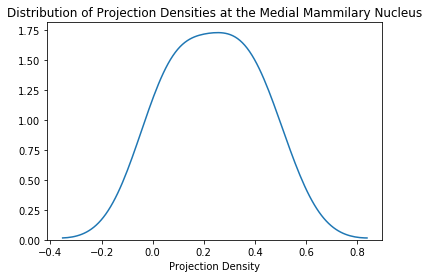

In [7]:
# Gives us a list of projection_densities in the medial mammilary nucleus
proj_dens = medial_mammillary['projection_density'].values


plt.title('Distribution of Projection Densities at the Medial Mammilary Nucleus')
plt.xlabel("Projection Density")
sns.kdeplot(proj_dens);

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Based on the distribution above, what do you think the values of the mean, median, and standard deviation are? Type your answer in the cell below:
</div>

*Your Answer Here*

## Part 1.4: The Mean, Median and Standard Deviation

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Let's calculate the mean of the projection densities from the subicculum to the medial mammillary nucleus. Assign this value to **mean**.

**Hint:** Recall the functions **sum** and **len** that allow you to calculate the mean as discussed in the Pre-Lab.
</div>

In [8]:
mean = sum(proj_dens) / len(proj_dens)
mean

0.23557054765769622

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Now, Find the **median** of the projection densities from the subiculum to the medial mammillary nucleus. Assign this value to **median**.

**Hint:** Recall the function **.sort_values** discussed in the Pre-Lab.
</div>

In [29]:
median = medial_mammillary.sort_values('projection_density', ascending=False)['projection_density'].values[2]
median

0.24814843696811198

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Find the **standard deviation** of the projection densities from the subiculum to the medial mammillary nucleus. Assign this value to **standard_dev**.

Recall:

$$\sigma = \sqrt{\sum_{i=1}^N \frac{(x-\mu)^2}{N - 1}}$$

* $\sigma$ = standard deviation
* $x$ = data
* $\mu$ = mean
* $N$ = number of values
</div>

In [ ]:
standard_dev = np.sqrt(sum((proj_dens - sub_mean)**2) / (len(proj_dens) - 1))
standard_dev

## Part 1.5: Average Projection Densities

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Using our statistical analysis, we can observe the average projection densities at the top 20 sites where the subiculum maps to for the 5 wildtype injections. Run the cell below to visualize a bar chart representation of this.
</div>

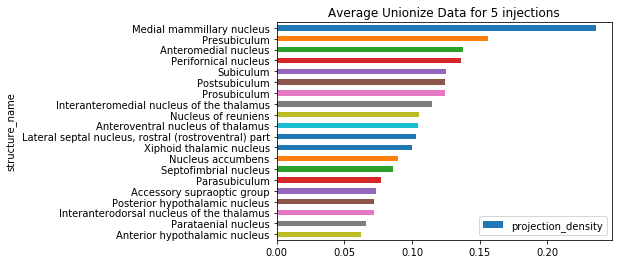

In [10]:
# Run this cell

# We can combine groupby and mean to find the average projection density across experiments for each summary structure
unionizes_set_mean = (unionizes_set.groupby('structure_id', as_index = False)['projection_density'].mean())

# Again, add a column with summary structure acronyms so we can interpret the unionizes more easily
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]
unionizes_set_mean['structure_name'] = names
unionizes_set_mean.sort_values(by = 'projection_density', ascending = False, inplace = True)

# Plot the 20 structures with the highest average projection density across all wild type Subiculum injections
unionizes_set_mean[:20].plot('structure_name', 'projection_density', kind='barh')
plt.gca().invert_yaxis()
plt.title('Average Unionize Data for %i injections'%len(experiment_set));

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
The cell below provides statistics (i.e. mean and standard deviation) of the projection densities from the subiculum to various structures.
</div>

In [11]:
# look at the data
# re-generate means so they are in the same order as standard deviation
unionizes_set_mean = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].mean())

# generate a second data frame with standard deviations
unionizes_set_std = (
    unionizes_set.groupby('structure_id', as_index = False)[
    'projection_density'].std())

# find names from structure ids
names = [name_map[strid] for strid in unionizes_set_mean['structure_id']]

# combine names, mean, and standard deviation into one dataframe for easy plotting
set_mean_std = pd.DataFrame({'structure_name': names, 
                            'mean_projection_density': unionizes_set_mean['projection_density'], 
                            'stdev':  unionizes_set_std['projection_density']
                            })

# sort the dataframe to get the top 20 values on top
set_mean_std.sort_values(by = 'mean_projection_density', ascending = False, inplace = True)

set_mean_std.head()

,structure_name,mean_projection_density,stdev
145,Medial mammillary nucleus,0.235571,0.170507
282,Presubiculum,0.156300,0.164140
35,Anteromedial nucleus,0.137534,0.125943
308,Perifornical nucleus,0.136466,0.101008
146,Subiculum,0.124839,0.083361


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Do your results match those in our visualization and the table above? Explain in the cell below.
</div>

*Your Answer Here*

# Part 2: Bootstrap

## Part 2.1: Aquiring the Data

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

For this part of the lab, we will apply a technique called boostraping to analyze the probability of a structure being a part of a circuit. We will start off with looking at the Primary Visual Cortex since it has more wildtype injections than the subiculum, with 33 wildtype samples. 

The **visual_unionizes_set** consists of all of the structures that the Primary visual area projects to for every experiment done.
</div>

In [12]:
# Run this cell
VISp = structure_tree.get_structures_by_name(["Primary visual area"])
VISp_id = VISp[0]['id']
visual_experiments = mcc.get_experiments(injection_structure_ids=[VISp_id]) 
visual_experiment_set = [exp['id'] for exp in visual_experiments if exp['transgenic_line'] == None]
visual_data = pd.DataFrame(visual_experiment_set)

visual_unionizes_set = mcc.get_structure_unionizes(visual_experiment_set,
                                               is_injection = False,
                                                structure_ids = summary_structure_ids,
                                               hemisphere_ids = [3])
visual_names = [name_map[strid] for strid in visual_unionizes_set['structure_id']]
visual_unionizes_set['structure_name'] = visual_names

/anaconda3/lib/python3.7/site-packages/allensdk/api/cache.py:346: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  data = reader(path)


In [13]:
visual_unionizes_set.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume,structure_name
0,3,636132166,False,1.000000,9370,2500,9450,0.105844,0.129473,280.100383,2163.396424,0.070242,307297141,312782574,2.717960e+11,442877400.0,1.240501e+11,5.734045e+07,0.542525,Laterointermediate area
1,3,636130952,False,0.176642,3690,3470,6460,0.000097,0.000069,0.029395,424.604137,0.000064,307297141,44,1.842736e+11,759889792.0,2.233689e+07,5.260639e+04,0.930865,Infralimbic area
2,3,636131320,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,246,7.140429e+09,123998400.0,0.000000e+00,0.000000e+00,0.151898,"Midbrain reticular nucleus, retrorubral area"
3,3,636131638,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,460,5.506341e+08,8535600.0,0.000000e+00,0.000000e+00,0.010456,Midbrain trigeminal nucleus
4,3,636132128,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,599626923,4.878733e+08,13030200.0,0.000000e+00,0.000000e+00,0.015962,Subcommissural organ


## Part 2.2: Medial Mammilary Nucleus DataFrame

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

In the next cell, we want to obtain the projection densities for the different injections to the Primary visual area that project to the medial mammillary nucleus. We do this in the first line and we name it **mmn** to differentiate from the variable **medial_mammillary**. Next, we arrange the projection densities from biggest to smallest. We will place these projection densities in a DataFrame that we can then use for boostrapping. 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
In the next cell, use the **sort_values** function to sort the values for **projection_density** from greatest to least and assign this table to **mmn_sorted**.

In [22]:
mmn = visual_unionizes_set[visual_unionizes_set['structure_name'] == 'Medial mammillary nucleus']
mmn_sorted = mmn.sort_values('projection_density', ascending = False)
mmn_sorted

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume,structure_name
3515,3,634032049,False,1.000000,8090,5990,5320,1.328822e+00,3.538519e-01,1138.899407,3218.576685,2.107188e-01,114008926,491,6.415024e+11,486122392.0,5.536445e+11,1.720153e+08,0.5955,Medial mammillary nucleus
10280,3,646284475,False,1.000000,7980,6330,6360,1.576548e-01,5.548555e-02,270.827072,4881.037911,3.304164e-02,638314843,491,4.027480e+11,486122392.0,1.316551e+11,2.697277e+07,0.5955,Medial mammillary nucleus
2874,3,633168414,False,0.284950,7950,6390,6290,1.325311e-03,6.992152e-04,0.040531,57.966545,4.163826e-04,113887868,491,6.147510e+09,486122392.0,1.970307e+07,3.399042e+05,0.5955,Medial mammillary nucleus
7639,3,633615180,False,0.284441,8420,6040,5390,5.524112e-04,1.875576e-04,0.026422,140.871395,1.116905e-04,127138787,491,3.928621e+10,486122392.0,1.284408e+07,9.117595e+04,0.5955,Medial mammillary nucleus
8449,3,629955059,False,0.223132,8440,6050,5330,7.328016e-04,1.599213e-04,0.018433,115.264187,9.523310e-05,174361040,491,7.776820e+10,486122392.0,8.960788e+06,7.774130e+04,0.5955,Medial mammillary nucleus
4108,3,631611475,False,0.230096,8420,5910,5910,1.959894e-03,1.274190e-04,0.023645,185.567264,7.587801e-05,277712166,491,5.181022e+10,486122392.0,1.149426e+07,6.194123e+04,0.5955,Medial mammillary nucleus
9262,3,631153390,False,0.159229,8380,5960,5280,2.869176e-04,1.135539e-04,0.011388,100.286130,6.762134e-05,272782668,491,1.339557e+11,486122392.0,5.535904e+06,5.520110e+04,0.5955,Medial mammillary nucleus
5780,3,636115943,False,0.267740,8460,6190,5970,7.019558e-04,1.053974e-04,0.015235,144.549890,6.276417e-05,304585910,491,7.570910e+10,486122392.0,7.406166e+06,5.123606e+04,0.5955,Medial mammillary nucleus
6971,3,633931898,False,0.148116,7830,6280,5720,2.488078e-04,8.506233e-05,0.024884,292.540876,5.065461e-05,126862385,491,9.362658e+10,486122392.0,1.209677e+07,4.135071e+04,0.5955,Medial mammillary nucleus
7547,3,634239278,False,0.534857,8020,6370,4920,5.733060e-05,7.626726e-05,0.029660,388.898137,4.541715e-05,307296433,491,4.674378e+10,486122392.0,1.441848e+07,3.707522e+04,0.5955,Medial mammillary nucleus


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
In the next cell, use your knowledge of the **.values** function and the **[...}** method to obtain an list with all the values for the projection densities. Set this equal to **mmn_values**.

In [23]:
mmn_values = mmn_sorted['projection_density'].values
mmn_values

array([3.53851879e-01, 5.54855498e-02, 6.99215228e-04, 1.87557598e-04,
       1.59921258e-04, 1.27419001e-04, 1.13553904e-04, 1.05397442e-04,
       8.50623343e-05, 7.62672564e-05, 6.96496052e-05, 5.50569880e-05,
       4.81055549e-05, 3.82561235e-05, 3.21326946e-05, 3.04819335e-05,
       2.96921059e-05, 2.64879792e-05, 1.21357127e-05, 9.85602408e-06,
       9.83749942e-06, 9.46315358e-06, 6.95636149e-06, 6.37881662e-06,
       5.13140928e-06, 2.05455434e-06, 1.48721138e-06, 1.32933310e-06,
       4.21888049e-07, 7.88465769e-08, 2.38114485e-08, 3.44629633e-09,
       0.00000000e+00])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Run the cells below to create a DataFrame with the **mmn_values**. We will use this table for bootstrapping. 

In [24]:
mmn_data = {'Medial mammillary nucleus': mmn_values}
mmn_dataframe = pd.DataFrame(data=mmn_data)
mmn_dataframe.head()

,Medial mammillary nucleus
0,0.353852
1,0.055486
2,0.000699
3,0.000188
4,0.000160


## Part 2.3: Bootstrapping

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
The essence of bootstrapping is reliant on a population. In this case, the population is going to be that of the neurons that project to the medial mammillary nucleus from the primary visual area. We obtained a sample, the 33 wildtype experiments from the primary visual area. 

Fill in the code below that will sample with replacement from the population 5000 times using the mean as our test statistic. This will make sure that our number is big enough to be accurate and representative of the population.

</div>

In [26]:
# Run this cell
means = []
for i in np.arange(5000):
    resampled = mmn_dataframe.sample(n = 33, replace = True)
    mean = resampled.mean()
    means = np.append(means, mean)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We will now graph the resampled means in the histogram below. 
</div>

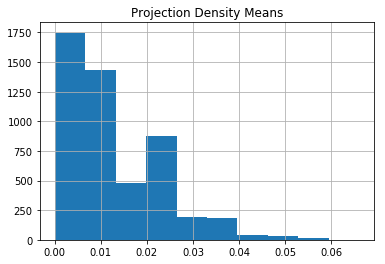

In [27]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Now, let's overlay the mean projection density from the subiculum to the medial mammillary nucleus onto the histogram shown above.
</div>

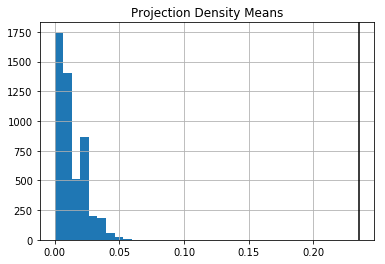

In [52]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.axvline(sub_mean, color = 'k');

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
What can we see about the difference between the mean projection densities from primary visual area to the medial mammillary nucleus and the mean projection density from the subiculum to the medial mammillary nucleus?
</div>

*From the histogram above, it is obvious that the mean projection density from the subiculum and the one from the primary visual area do not come from the same underlying population distribution, due to the sharp contrast in numbers.*

<h3 align="center">What does this mean in terms of connectivity?</h3>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
  
Since the subiculum and the medial mammillary nucleus are a part of the Papez Circuit, it makes sense why the mean projection density is large. In contrast, the mean projection density for the primary visual cortex to the medial mammillary nucleus is low, making this structure not a part of the Papez Circuit (even though there is still minimal connectivity).
</div>

## Part 2.4: 95% Confidence Interval

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">

Using the bootstrapped sample means calculated above, we will create a 95% confidence interval using the **quantile** function. This will give us an interval with the true mean of all projection densities from the primary visual area to the medial mammillary nucleus. 

Run the cell below to obtain the 95% Confidence Interval. Run the cell below that to overlay the 95% Confidence Interval over the projection density mean distribution.

</div>

In [28]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)
percentile = list(mmn_means.quantile([0.025, 0.975])['Projection Density Means'])
percentile

[4.363946772387537e-05, 0.03558317989825072]

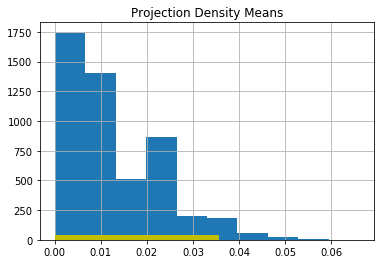

In [55]:
# Run this cell
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn).hist()
plt.hlines(y=0, xmin=percentile[0], xmax=percentile[1], linewidth=10, color = 'y');

## Part 2.5: The P-Value

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Below, we will calculate the ***p-value*** using the above distribution and a random mean named **mystery_mean** that will simulate a mean projection density obtained from one of the injections into the primary visual area that projects to the medial mammillary nucleus. We must come up with a null hypothesis and an alternative hypothesis in order to use the p-value.

Write down your **Null Hypothesis** and your **Alternative Hypothesis** below. Run the cells and find the p-value for further analysis. 

</div>

**Null hypothesis**: *The mystery_mean comes from the same underlying distribution as that of the medial mammilary nucleus.* 


**Alternative hypothesis**: *The mystery_mean does not come from the same underlying distribution, and any correlation is purely due to chance.*

In [25]:
# Run this cell
mystery_mean = 0.0434
mmn = {'Projection Density Means': means}
mmn_means = pd.DataFrame(data=mmn)

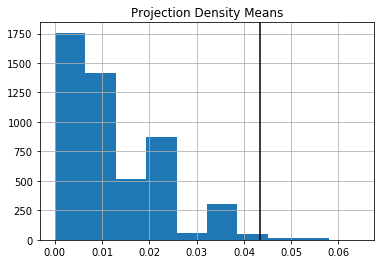

In [26]:
mmn_means.hist()
plt.axvline(mystery_mean, color = 'k')

In [27]:
p_value = np.average(mmn_means > mystery_mean)
p_value

0.0102

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
Based on the p-value calculated above, do we reject or fail to reject the null hypothesis? Explain.
</div>

*Since the p_value is less than 0.05 (chosen by convention), we can reject the null hypothesis. This means that our mystery_mean did not come from the same underlying distribution as the means from the primary visual area, so we can assume that our mystery_mean is not coming from the primary visual area.*

## Conclusion

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #f0f0ff; ">
    
We hoped that this lab served as a good introductions to the tools and the statistical analysis used in neuroinformatics. Neuroinformatics is a growing field and every year, new techniques are being invented for collection of large neural information. Because of this, it is important to know how to analyze and manipulate this data. 

If you liked the lab and would like to further your data science techniques, below are some introductary courses that may interest you:

***Data 8: The Foundations of Data Science***

***Data 100: Principles and Techniques of Data Science***

***Prob 140: Probability for Data Science***
</div>